In [4]:
#Ejemplo sobre la fertilidad de los conejos de acuerdo a su edad, aclarando que la salud, alimentación y otros factores incide en los datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures



In [5]:
#Se carga el dataset desde un archivo CSV
data = pd.read_csv('sample_data/Conejos.csv')

#Se obtienen los valores de edad y fertilidad
age = data['Age'].values
fertility = data['Fertility'].values



In [6]:
#Se crea una matriz de características polinómicas
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(age.reshape(-1, 1))

#Se crea y ajustaa el modelo de regresión lineal
regression = LinearRegression()
regression.fit(X_poly, fertility)



LinearRegression()

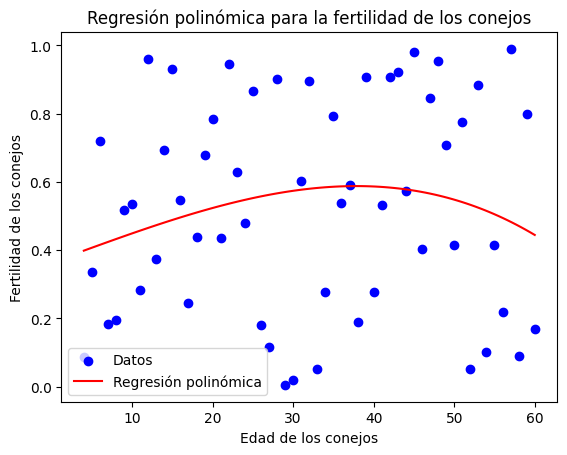

In [8]:
#se Predicen la fertilidad para valores de edad continuos
age_continuous = np.linspace(min(age), max(age), 100).reshape(-1, 1)
X_poly_continuous = poly_features.transform(age_continuous)
fertility_predicted = regression.predict(X_poly_continuous)

#Mostramos los resultados
plt.scatter(age, fertility, color='blue', label='Datos')
plt.plot(age_continuous, fertility_predicted, color='red', label='Regresión polinómica')
plt.xlabel('Edad de los conejos')
plt.ylabel('Fertilidad de los conejos')
plt.title('Regresión polinómica para la fertilidad de los conejos')
plt.legend()
plt.show()